# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Capstone Project-5 (Hand_Written_Digits)</b></p>
 İlhami MUTLU [Linkedin](https://www.linkedin.com/in/ilhami-mutlu-653b02242/) |

#                              Hand Written Digits Project

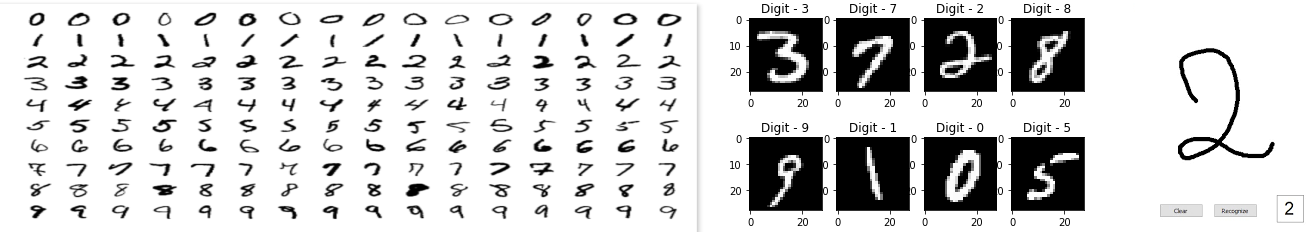

Pen-Based Recognition of Handwritten Digits
We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format.

We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds.

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution. Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to write only inside these boxes. If they make a mistake or are unhappy with their writing, they are instructed to clear the content of a box by using an on-screen button. The first ten digits are ignored because most writers are not familiar with this type of input devices, but subjects are not aware of this.

In our study, we use only ($x, y$) coordinate information. The stylus pressure level values are ignored. First we apply normalization to make our representation invariant to translations and scale distortions. The raw data that we capture from the tablet consist of integer values between 0 and 500 (tablet input box resolution). The new coordinates are such that the coordinate which has the maximum range varies between 0 and 100. Usually $x$ stays in this range, since most characters are taller than they are wide.

Attribute information 
In order to train and test our classifiers, we need to represent digits as constant length feature vectors. A commonly used technique leading to good results is resampling the ( x_t, y_t) points. Temporal resampling (points regularly spaced in time) or spatial resampling (points regularly spaced in arc length) can be used here. Raw point data are already regularly spaced in time but the distance between them is variable. Previous research showed that spatial resampling to obtain a constant number of regularly spaced points on the trajectory yields much better performance, because it provides a better alignment between points. Our resampling algorithm uses simple linear interpolation between pairs of points. The resampled digits are represented as a sequence of T points ( x_t, y_t )_{t=1}^T, regularly spaced in arc length, as opposed to the input sequence, which is regularly spaced in time.

So, the input vector size is 2*T, two times the number of points resampled. We considered spatial resampling to T=8,12,16 points in our experiments and found that T=8 gave the best trade-off between accuracy and complexity.

The way we used the dataset was to use first half of training for actual training, one-fourth for validation and one-fourth for writer-dependent testing. The test set was used for writer-independent testing and is the actual quality measure.

The columns from **input1" to "input16"** represent the pixels of these images. For instance, "input1" column contains the grayscale intensity of the first pixel, "input2" column represents the intensity of the second pixel, and so forth. Each column corresponds to a specific pixel of the image. These pixel values can be utilized for training or testing an artificial intelligence model.

# Project' s Aim

In this project, it is aimed to determine the most successful machine learning model in classifying the numbers in a data set consisting of handwritten numbers. Among the classification models, SVM (Support Machine Learning), Decision Tree and Random Forests were selected.

# About For SVM, Decision Tree and Random Forests Models

Here's an explanation of Support Vector Machine (SVM), Decision Tree, and Random Forests, along with their differences:

1. **Support Vector Machine (SVM):**
   - SVM is a machine learning model used for classification and regression problems.
   - Its objective is to find the best separation line (hyperplane) that separates data points from different classes.
   - SVM aims to separate data points with the widest margin between classes using a hyperplane.
   - If the data isn't linearly separable, it can try to make it linearly separable by using the kernel method.

2. **Decision Tree:**
   - Decision trees are models that represent a series of decisions and outcomes in a tree-like structure.
   - Each internal node represents a decision point, and each leaf node represents an outcome.
   - They make decisions in the tree's branches based on features in the dataset to determine outcomes.
   - Decision trees can create a structured and understandable representation of the dataset.

3. **Random Forests:**
   - Random Forests are an ensemble of multiple decision trees.
   - Each tree is trained on random subsets of features and data.
   - Then, predictions are made by averaging results from each tree (for regression) or by voting (for classification).
   - Random Forests can be resistant to overfitting and often perform well on high-dimensional and complex datasets.

Differences:
- SVM attempts to separate data points with the widest margin using a hyperplane, whereas decision trees and random forests learn from the structure of the dataset.
- Decision trees usually offer a more interpretable and understandable representation of data compared to SVM and random forests.
- Random Forests may require higher computational power since they are a combination of many decision trees.

# Import libraries

In [1]:
# Libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

# To show graphics
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

# Sklearn library for machine learning algorithms, data preprocessing and evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, auc

# To get rid of warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Exploratory Data Analysis and Visualization

In [2]:
df = pd.read_csv("pendigits_txt.csv") 

In [3]:
df.head()

input1  input2  input3  input4  input5  input6  input7  input8  input9  \
0      47     100      27      81      57      37      26       0       0   
1       0      89      27     100      42      75      29      45      15   
2       0      57      31      68      72      90     100     100      76   
3       0     100       7      92       5      68      19      45      86   
4       0      67      49      83     100     100      81      80      60   

   input10  input11  input12  input13  input14  input15  input16  class  
0       23       56       53      100       90       40       98      8  
1       15       37        0       69        2      100        6      2  
2       75       50       51       28       25       16        0      1  
3       34      100       45       74       23       67        0      4  
4       60       40       40       33       20       47        0      1

In [4]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(df)

Data shape: (10992, 17)
___________________________
Data Types:
int64    17
Name: Types, dtype: int64
___________________________


Types  Counts  Uniques  Nulls  Min  Max
class    int64   10992       10      0    0    9
input1   int64   10992      101      0    0  100
input10  int64   10992      101      0    0  100
input11  int64   10992      101      0    0  100
input12  int64   10992      101      0    0  100
input13  int64   10992      101      0    0  100
input14  int64   10992      101      0    0  100
input15  int64   10992      101      0    0  100
input16  int64   10992      101      0    0  100
input2   int64   10992       96      0    0  100
input3   int64   10992      101      0    0  100
input4   int64   10992       98      0    0  100
input5   int64   10992      101      0    0  100
input6   int64   10992      101      0    0  100
input7   int64   10992      101      0    0  100
input8   int64   10992      101      0    0  100
input9   int64   10992      101      0    0  100

In [5]:
# Checks for duplicate observations in the dataset and removes them

def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

In [6]:
duplicate_values(df)

Duplicate check...
There are no duplicated observations in the dataset.


In [7]:
df.describe().T

count       mean        std  min   25%   50%    75%    max
input1   10992.0  38.814320  34.257783  0.0   6.0  32.0   65.0  100.0
input2   10992.0  85.120269  16.218571  0.0  76.0  89.0  100.0  100.0
input3   10992.0  40.605622  26.342984  0.0  20.0  40.0   58.0  100.0
input4   10992.0  83.774199  19.163646  0.0  72.0  91.0  100.0  100.0
input5   10992.0  49.770378  34.100515  0.0  18.0  53.0   78.0  100.0
input6   10992.0  65.573144  26.996688  0.0  49.0  71.0   86.0  100.0
input7   10992.0  51.220251  30.576881  0.0  28.0  53.5   74.0  100.0
input8   10992.0  44.498999  29.906104  0.0  23.0  43.0   64.0  100.0
input9   10992.0  56.868541  34.135530  0.0  29.0  60.0   89.0  100.0
input10  10992.0  33.695961  27.251548  0.0   7.0  33.0   54.0  100.0
input11  10992.0  60.516376  37.288086  0.0  23.0  73.0   97.0  100.0
input12  10992.0  34.826510  27.119982  0.0  11.0  30.0   55.0  100.0
input13  10992.0  55.022289  22.335539  0.0  42.0  53.0   68.0  100.0
input14  10992.0  34.937045  33.155463  0.0   5.0  27.0   47.0  100.0
input15  10992.0  47.287482  41.760400  0.0   0.0  40.0  100.0  100.0
input16  10992.0  28.845342  35.778094  0.0   0.0   9.0   51.0  100.0
class    10992.0   4.431587   2.876947  0.0   2.0   4.0    7.0    9.0

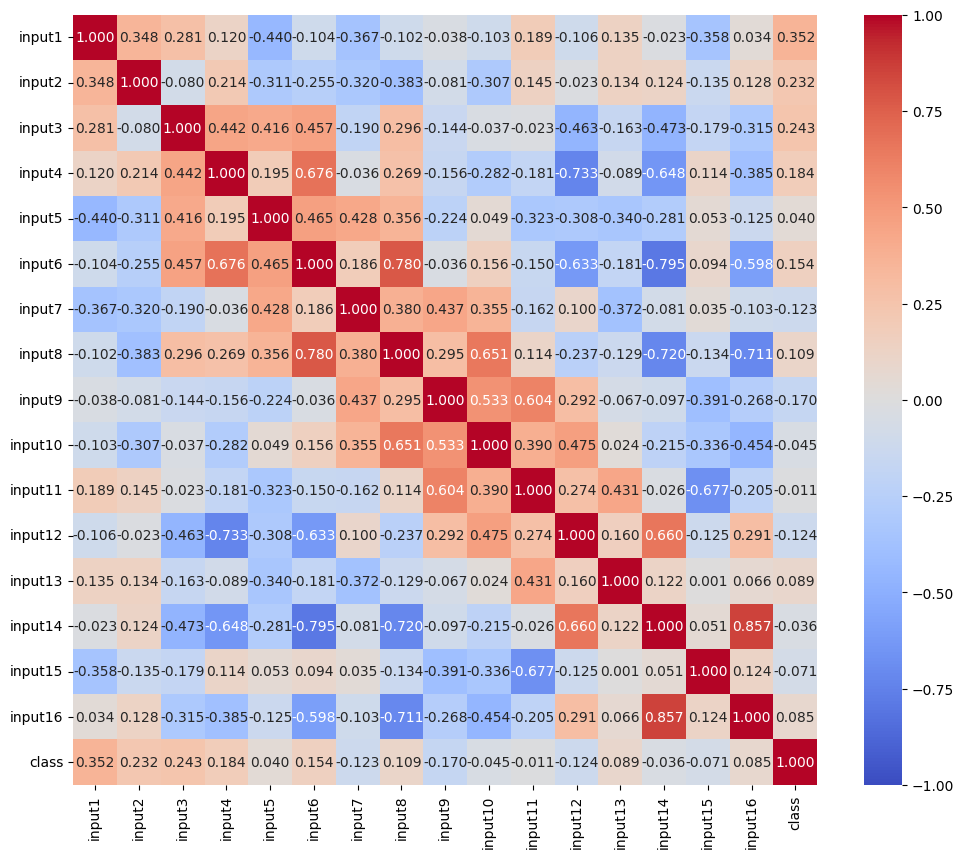

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),vmin=-1,vmax=1, annot=True, fmt='.3f', cmap='coolwarm');

## Missing Value Control 

In [9]:
# Detects null values in the data set and sorts them as numbers and percentages

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending = False)
    missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    missing_values = pd.concat([missing_number, missing_percent], axis = 1, keys = ['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number'] > 0]

In [10]:
missing_values(df)

Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []

In [11]:
# Shows unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"--- {column} Column' s Unique Values ---")
    print(unique_values)
    print("\n")

--- input1 Column' s Unique Values ---
[ 47   0 100  13  57  74  48  91  35  50  99  24  12  10  73  54  11  36
  46  61  32  40  27  30  29  77  64   9  60   5   1  63  51  56  17  41
  20  18  97  37  94  80  34  90  38  72  26   8  31  16  21  95  39  22
   3  19  33  14  42   4  43  15  85   7  44  45  49  52  96  53  68  84
  67  28  86   2  65  88  98  79  83  89  58  78  69  92  76  62  70  93
  23  55  25   6  66  81  59  75  82  71  87]


--- input2 Column' s Unique Values ---
[100  89  57  67  39  87  96  74  85  76  84  80  66  73  77  46  86  62
  92  59  99  98   0  91  97  93  83  90  72  88  75  82  78  63  81  61
  79  71  94  69  51  65  60  58  55  68  70  42  38  52  95  47  48  64
  54  45  53  32  56  50  36  44  12  40  49  43  34  35  23   6  29  26
  11   5  31  37  24  14   3  30  33   4  20  13  25   9  28  41  22  17
  16  21  27   8  15  18]


--- input3 Column' s Unique Values ---
[ 27  31   7  49  88   3   2  12  22  62  72  54  38  57  66  63  43  19
  20

## input1 

In [12]:
df['input1'].value_counts(normalize=True)

0      0.215066
100    0.103985
32     0.012464
26     0.011736
38     0.011190
         ...   
98     0.003093
92     0.003002
91     0.002911
99     0.002911
94     0.002547
Name: input1, Length: 101, dtype: float64

In [13]:
fig = px.box(df, color="class", y= "input1")
fig.show()

## input2

In [14]:
df['input2'].value_counts(normalize=True)

100    0.283388
90     0.023745
91     0.023563
88     0.023108
96     0.022471
         ...   
16     0.000091
11     0.000091
8      0.000091
6      0.000091
18     0.000091
Name: input2, Length: 96, dtype: float64

In [15]:
fig = px.box(df, color="class", y= "input2")
fig.show()

## input3

In [16]:
df['input3'].value_counts(normalize=True)

0      0.086699
100    0.028111
35     0.016830
46     0.016103
39     0.015284
         ...   
97     0.002092
96     0.001910
91     0.001820
99     0.001547
94     0.001456
Name: input3, Length: 101, dtype: float64

In [17]:
fig = px.box(df, color="class", y= "input3")
fig.show()

## input4

In [18]:
df['input4'].value_counts(normalize=True)

100    0.399108
75     0.015739
78     0.015648
81     0.015557
77     0.015557
         ...   
17     0.000182
13     0.000182
19     0.000182
7      0.000091
6      0.000091
Name: input4, Length: 98, dtype: float64

In [19]:
fig = px.box(df, color="class", y= "input4")
fig.show()

## input5

In [20]:
df['input5'].value_counts(normalize=True)

0      0.142649
100    0.105076
66     0.014465
68     0.011827
65     0.011645
         ...   
4      0.005004
30     0.004458
99     0.003912
98     0.003730
3      0.003548
Name: input5, Length: 101, dtype: float64

In [21]:
fig = px.box(df, color="class", y= "input5")
fig.show()

## input6 

In [22]:
df['input6'].value_counts(normalize=True)

100    0.101437
0      0.036117
78     0.019196
75     0.018832
79     0.018650
         ...   
9      0.002092
6      0.001910
8      0.001729
4      0.001547
3      0.001092
Name: input6, Length: 101, dtype: float64

In [23]:
fig = px.box(df, color="class", y= "input6")
fig.show()

## input7

In [24]:
df['input7'].value_counts(normalize=True)

0      0.089884
100    0.081787
68     0.014101
56     0.013191
61     0.012918
         ...   
21     0.004367
96     0.003912
98     0.003639
1      0.003457
97     0.003275
Name: input7, Length: 101, dtype: float64

In [25]:
fig = px.box(df, color="class", y= "input7")
fig.show()

## input8

In [26]:
df['input8'].value_counts(normalize=True)

0      0.141557
100    0.066230
35     0.016648
34     0.016103
40     0.016012
         ...   
6      0.003275
91     0.003093
97     0.003002
2      0.002820
7      0.002729
Name: input8, Length: 101, dtype: float64

In [27]:
fig = px.box(df, color="class", y= "input8")
fig.show()

## input9

In [28]:
df['input9'].value_counts(normalize=True)

100    0.160480
0      0.093523
84     0.011554
88     0.011281
94     0.010280
         ...   
21     0.004640
4      0.004367
2      0.004094
18     0.003730
9      0.003548
Name: input9, Length: 101, dtype: float64

In [29]:
fig = px.box(df, color="class", y= "input9")
fig.show()

## input10

In [30]:
df['input10'].value_counts(normalize=True)

0     0.203694
75    0.021561
35    0.016285
44    0.014465
36    0.013737
        ...   
95    0.001001
93    0.000910
99    0.000819
98    0.000728
97    0.000546
Name: input10, Length: 101, dtype: float64

In [31]:
fig = px.box(df, color="class", y= "input10")
fig.show()

## input11

In [32]:
df['input11'].value_counts(normalize=True)

100    0.225801
0      0.118268
88     0.012100
91     0.012100
87     0.011827
         ...   
46     0.003548
41     0.003275
39     0.003275
37     0.003184
43     0.003184
Name: input11, Length: 101, dtype: float64

In [33]:
fig = px.box(df, color="class", y= "input11")
fig.show()

## input12

In [34]:
df['input12'].value_counts(normalize=True)

0      0.111627
50     0.020378
100    0.017467
16     0.017376
15     0.016557
         ...   
87     0.001365
96     0.001274
99     0.001274
98     0.001274
97     0.001183
Name: input12, Length: 101, dtype: float64

In [35]:
fig = px.box(df, color="class", y= "input12")
fig.show()

## input13

In [36]:
df['input13'].value_counts(normalize=True)

100    0.046306
50     0.040302
51     0.028475
49     0.027111
53     0.023290
         ...   
4      0.001456
6      0.001365
5      0.001274
2      0.001183
1      0.000819
Name: input13, Length: 101, dtype: float64

In [37]:
fig = px.box(df, color="class", y= "input13")
fig.show()

## input14

In [38]:
df['input14'].value_counts(normalize=True)

0      0.159753
100    0.081332
25     0.026747
1      0.022380
32     0.021197
         ...   
75     0.001456
76     0.001274
67     0.001274
72     0.001183
70     0.001092
Name: input14, Length: 101, dtype: float64

In [39]:
fig = px.box(df, color="class", y= "input14")
fig.show()

## input15

In [40]:
df['input15'].value_counts(normalize=True)

100    0.271834
0      0.265375
7      0.008734
8      0.008097
9      0.007824
         ...   
68     0.002911
53     0.002820
96     0.002638
61     0.002274
99     0.002001
Name: input15, Length: 101, dtype: float64

In [41]:
fig = px.box(df, color="class", y= "input15")
fig.show()

## input16

In [42]:
df['input16'].value_counts(normalize=True)

0      0.367904
100    0.069050
1      0.020742
2      0.016830
5      0.015921
         ...   
58     0.002183
64     0.002001
61     0.001910
59     0.001729
54     0.001729
Name: input16, Length: 101, dtype: float64

In [43]:
fig = px.box(df, color="class", y= "input16")
fig.show()

## class

In [44]:
df['class'].value_counts(normalize=True)

2    0.104076
4    0.104076
1    0.103985
0    0.103985
7    0.103894
6    0.096070
8    0.095979
5    0.095979
9    0.095979
3    0.095979
Name: class, dtype: float64

In [45]:
class_counts = df['class'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

fig = px.pie(class_counts, values='Count', names='Class', title='Class Distribution')
fig.show()
# It appears that the target variables in the 'class' column are equally distributed, indicating a balanced dataset.

In [46]:
df1 = df.copy()

In [47]:
df.to_excel('end.xlsx', index=False)

In [48]:
df = pd.read_excel('end.xlsx')

# Data Pre-Processing

## Train | Test Split

In [49]:
X= df.drop(columns="class")
y= df["class"]

In [50]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [51]:
X_train.head()

input1  input2  input3  input4  input5  input6  input7  input8  input9  \
3683       61      91      29     100      47      74      74      85     100   
10729       7      95      47     100      68      69      50      34      27   
6198        3      83      47      67      51      25       0       0      11   
6023      100     100      54      99      16      79       0      51      48   
9555       23      88       0      47      20       7      66       0     100   

       input10  input11  input12  input13  input14  input15  input16  
3683        51       97       12       50        0        0       11  
10729        0        0       19       44       31      100       35  
6198        37       65       69      100      100       21       92  
6023        51       76       27       47        1        1        0  
9555        29       91       76       52      100       12       78

In [52]:
X_test.head()

input1  input2  input3  input4  input5  input6  input7  input8  input9  \
2538        2     100      58      99      63      67      38      34      19   
9280       29     100      30      64      62      30      20       0       1   
1348        0      73       4     100      70     100      93      70      61   
10102      20      76      50     100     100      95      75      69      90   
4332        5     100      23      86       6      57       0      29      65   

       input10  input11  input12  input13  input14  input15  input16  
2538         0        0       32       42       44      100       44  
9280        31        0       77       41       93      100       95  
1348        38       15       12       31        0      100        6  
10102       51       88       23       49        0        0        7  
4332        30      100       54       89       28       93        0

In [53]:
X_train.shape, X_test.shape

((8793, 16), (2199, 16))

In [54]:
corr_by_class = X_train.join(y_train).corr()["class"].sort_values()[:-1]
corr_by_class

input9    -0.166530
input7    -0.122325
input12   -0.114946
input15   -0.078837
input10   -0.042249
input14   -0.028745
input11   -0.005690
input5     0.037591
input16    0.086779
input13    0.088685
input8     0.105429
input6     0.145368
input4     0.174562
input2     0.230310
input3     0.238375
input1     0.354582
Name: class, dtype: float64

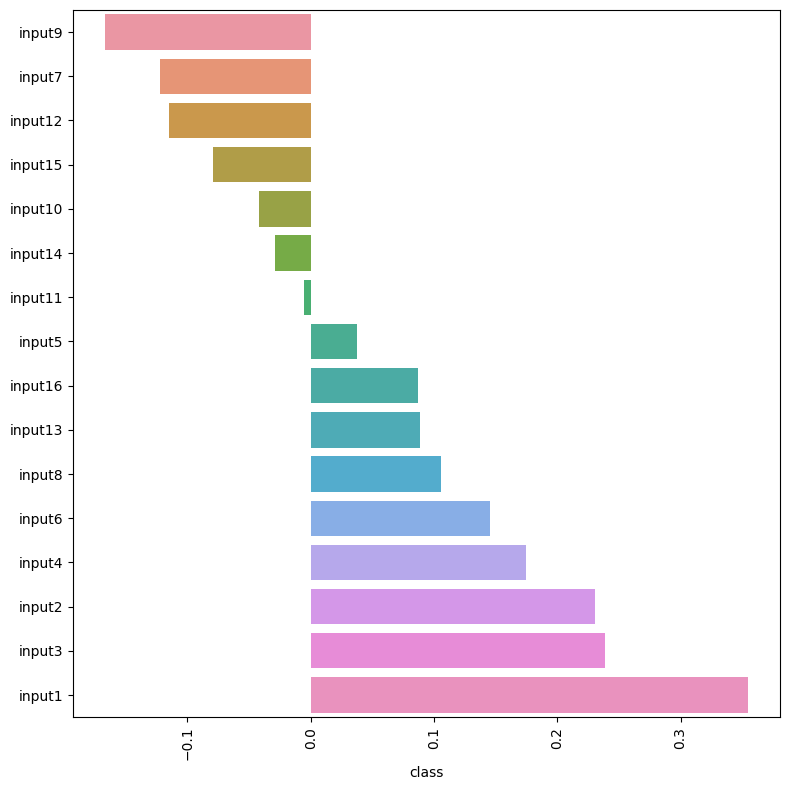

In [55]:
plt.figure(figsize = (8,8))
sns.barplot(y = corr_by_class.index, x = corr_by_class)
plt.xticks(rotation=90)
plt.tight_layout();

# Implement Support Vector Machine

In [56]:
from sklearn.svm import SVC

operations = [("scaler", StandardScaler()), ("svm", SVC())]

svm_pipe = Pipeline(steps=operations)

svm_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC())])

In [57]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [58]:
eval_metric(svm_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[238   0   0   0   0   0   1   0   0   0]
 [  0 217   0   1   0   0   0   0   0   0]
 [  0   1 232   0   0   0   0   0   0   0]
 [  0   0   1 189   0   0   0   1   0   0]
 [  0   0   0   0 242   0   0   0   0   0]
 [  0   0   0   2   0 211   0   0   0   1]
 [  0   0   0   0   0   0 228   0   0   0]
 [  0   1   0   0   0   0   0 245   0   0]
 [  0   1   0   0   0   1   0   1 196   0]
 [  0   0   0   0   0   0   0   0   0 189]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       0.99      1.00      0.99       218
           2       1.00      1.00      1.00       233
           3       0.98      0.99      0.99       191
           4       1.00      1.00      1.00       242
           5       1.00      0.99      0.99       214
           6       1.00      1.00      1.00       228
           7       0.99      1.00      0.99       246
           8       1.00      0.98      0.99       199
           9       

In [59]:
operations = [("scaler", StandardScaler()), ("SVC", SVC())]
svm_pipe = Pipeline(steps=operations)

scores = cross_validate(svm_pipe, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 3)
df_scores = pd.DataFrame(scores, index = range(1, 4))
df_scores.mean()[2:]

test_accuracy    NaN
test_precision   NaN
test_recall      NaN
test_f1          NaN
dtype: float64

## SVC GridsearchCV

C: It is the regularization parameter. The larger this parameter, the lower the classification error, but also the greater the risk of overfitting. Choosing this parameter small may provide better generalization performance.
We were using C to determine hard margin and soft margin. If the model is overfit, C must be reduced.

gamma was the kernel parameter. If the data was nonlinear rather than linear, we added kernel to separate the data, gamma is the kernel parameter.
gamma: Controls the kernel width used in RBF, polynomial and sigmoid kernels.

A low gamma value defines two points being close together and draws a smoother decision boundary.
A high gamma value, on the other hand, only affects very close points to each other and draws a more circular decision boundary.
With gamma='scale', the data is scaled so that each feature has the same weight for gamma, even if they are at a different scale

If the model is overfit, we need to reduce the gamma value, if the model is underfit, we need to increase the gamma value.

kernel: Determines the kernel function used to transform data into higher dimensional spaces. Kernels such as linear, polynomial, RBF (Gaussian) and sigmoid can be used.

degree: It is the degree parameter for the polynomial kernel. Its default value is 3.

In [60]:
svm_pipe.get_params() ## The answer to how to put money into the grid

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('SVC', SVC())],
 'verbose': False,
 'scaler': StandardScaler(),
 'SVC': SVC(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'SVC__C': 1.0,
 'SVC__break_ties': False,
 'SVC__cache_size': 200,
 'SVC__class_weight': None,
 'SVC__coef0': 0.0,
 'SVC__decision_function_shape': 'ovr',
 'SVC__degree': 3,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf',
 'SVC__max_iter': -1,
 'SVC__probability': False,
 'SVC__random_state': None,
 'SVC__shrinking': True,
 'SVC__tol': 0.001,
 'SVC__verbose': False}

In [61]:
param_grid = {"SVC__C":[0.01, 1],
             "SVC__gamma":[0.1, 0.3, 0.5],
             "SVC__kernel":["rbf", "linear"]}

In [62]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(class_weight="balanced"))]
pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model, param_grid, scoring='recall_macro', cv=5)

In [63]:
svm_model_grid.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC(class_weight='balanced'))]),
             param_grid={'SVC__C': [0.01, 1], 'SVC__gamma': [0.1, 0.3, 0.5],
                         'SVC__kernel': ['rbf', 'linear']},
             scoring='recall_macro')>

In [64]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC(class_weight='balanced'))]),
             param_grid={'SVC__C': [0.01, 1], 'SVC__gamma': [0.1, 0.3, 0.5],
                         'SVC__kernel': ['rbf', 'linear']},
             scoring='recall_macro')

In [65]:
svm_model_grid.best_score_

0.9952321614017441

In [66]:
svm_model_grid.best_params_

{'SVC__C': 1, 'SVC__gamma': 0.1, 'SVC__kernel': 'rbf'}

In [67]:
svm_model_grid.best_index_

6

In [68]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[238   0   0   0   0   0   1   0   0   0]
 [  0 216   0   1   0   0   0   1   0   0]
 [  0   1 232   0   0   0   0   0   0   0]
 [  0   0   1 189   0   0   0   1   0   0]
 [  0   0   0   0 242   0   0   0   0   0]
 [  0   0   0   2   0 211   0   0   0   1]
 [  0   0   0   0   0   0 228   0   0   0]
 [  0   1   0   0   0   0   0 245   0   0]
 [  0   1   0   0   0   1   0   1 196   0]
 [  0   0   0   0   0   0   0   0   0 189]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       0.99      0.99      0.99       218
           2       1.00      1.00      1.00       233
           3       0.98      0.99      0.99       191
           4       1.00      1.00      1.00       242
           5       1.00      0.99      0.99       214
           6       1.00      1.00      1.00       228
           7       0.99      1.00      0.99       246
           8       1.00      0.98      0.99       199
           9       

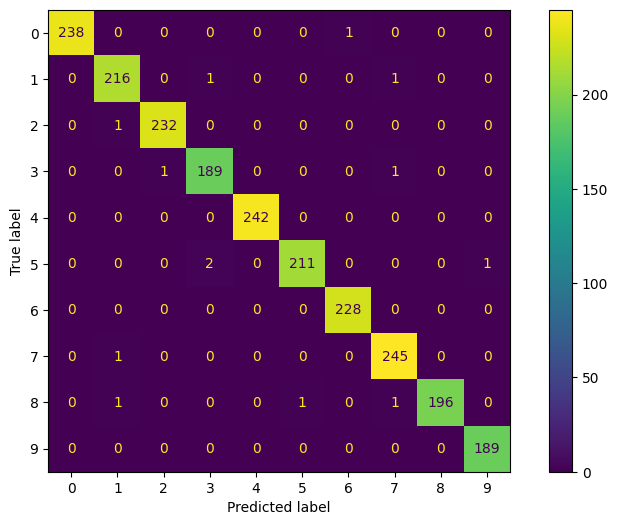

In [69]:
ConfusionMatrixDisplay.from_estimator(svm_model_grid, X_test, y_test)


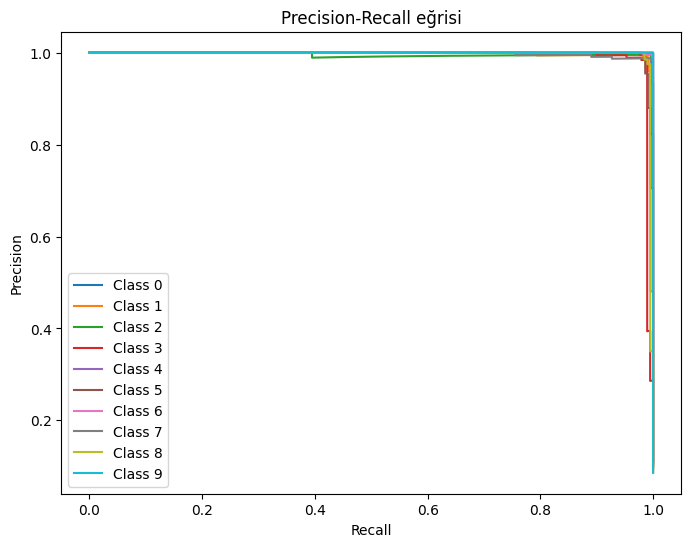

In [70]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Örnek bir çok sınıflı modelin çıktısı
y_scores = svm_model_grid.decision_function(X_test)

# Precision-recall eğrilerini hesaplamak için her sınıf için ayrı ayrı yapabilirsiniz
precision = dict()
recall = dict()
plt.figure(figsize=(8, 6))

# Her sınıf için precision-recall hesapla ve görselleştir
for i in range(10):  # num_classes, sınıf sayısı
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_scores[:, i])
    plt.plot(recall[i], precision[i], label='Class {}'.format(i))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.title('Precision-Recall eğrisi')
plt.show()



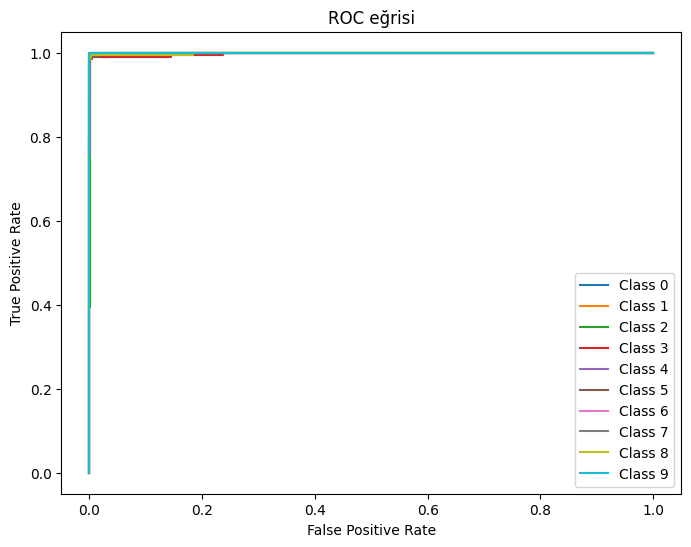

In [71]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Örnek bir çok sınıflı modelin çıktısı
y_scores = svm_model_grid.decision_function(X_test)

# ROC eğrilerini hesaplamak için her sınıf için ayrı ayrı yapabilirsiniz
fpr = dict()
tpr = dict()
plt.figure(figsize=(8, 6))

# Her sınıf için ROC hesapla ve görselleştir
for i in range(10):  # num_classes, sınıf sayısı
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_scores[:, i])
    plt.plot(fpr[i], tpr[i], label='Class {}'.format(i))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('ROC eğrisi')
plt.show()


# Decision Tree (DT) Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
DT_model = DecisionTreeClassifier(random_state = 101)

In [74]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [75]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

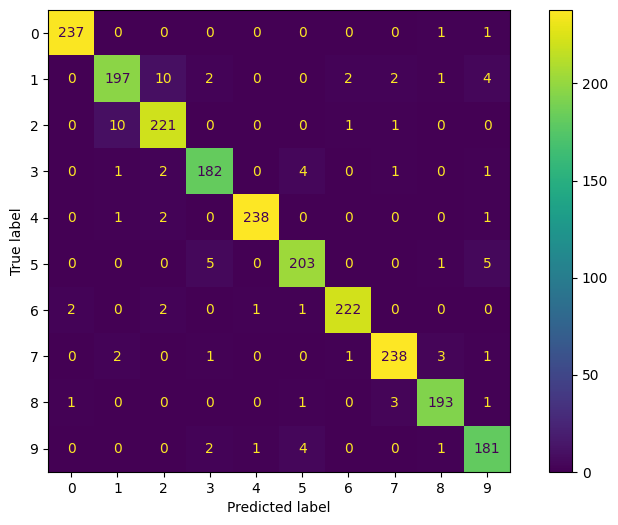

In [76]:
plot_confusion_matrix(DT_model, X_test, y_test);

In [77]:
from yellowbrick.classifier import ClassPredictionError

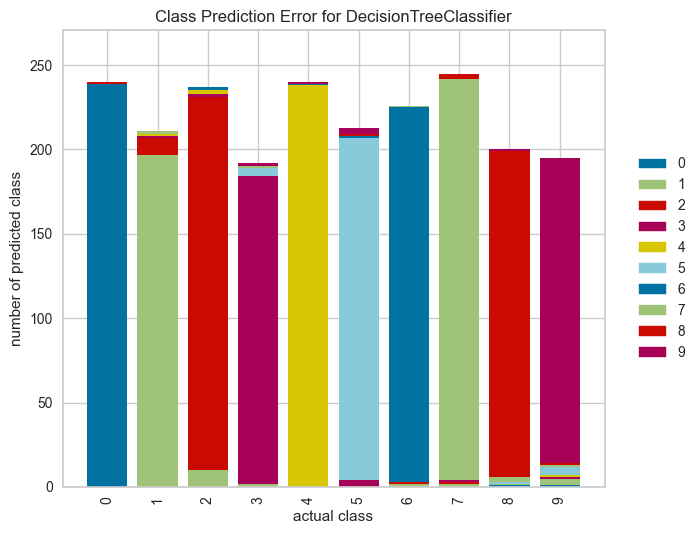

In [78]:
visualizer = ClassPredictionError(DT_model)

visualizer.fit(X_train, y_train)

visualizer.score(X_test, y_test)

visualizer.poof();

In [79]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set
[[237   0   0   0   0   0   0   0   1   1]
 [  0 197  10   2   0   0   2   2   1   4]
 [  0  10 221   0   0   0   1   1   0   0]
 [  0   1   2 182   0   4   0   1   0   1]
 [  0   1   2   0 238   0   0   0   0   1]
 [  0   0   0   5   0 203   0   0   1   5]
 [  2   0   2   0   1   1 222   0   0   0]
 [  0   2   0   1   0   0   1 238   3   1]
 [  1   0   0   0   0   1   0   3 193   1]
 [  0   0   0   2   1   4   0   0   1 181]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       239
           1       0.93      0.90      0.92       218
           2       0.93      0.95      0.94       233
           3       0.95      0.95      0.95       191
           4       0.99      0.98      0.99       242
           5       0.95      0.95      0.95       214
           6       0.98      0.97      0.98       228
           7       0.97      0.97      0.97       246
           8       0.96      0.97      0.97       199
           9       

In [80]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [81]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision_micro  \
1   0.075169    0.000000       0.955682              0.955682   
2   0.062852    0.015699       0.965909              0.965909   
3   0.062485    0.015892       0.956818              0.956818   
4   0.063056    0.000000       0.959044              0.959044   
5   0.062585    0.015695       0.947668              0.947668   
6   0.062823    0.010082       0.960182              0.960182   
7   0.068387    0.000000       0.959044              0.959044   
8   0.062493    0.015619       0.947668              0.947668   
9   0.062500    0.015619       0.962457              0.962457   
10  0.062492    0.000000       0.962457              0.962457   

    test_recall_micro  test_f1_micro  
1            0.955682       0.955682  
2            0.965909       0.965909  
3            0.956818       0.956818  
4            0.959044       0.959044  
5            0.947668       0.947668  
6            0.960182       0.960182  
7            0.959044       0.959044  
8            0.947668       0.947668  
9            0.962457       0.962457  
10           0.962457       0.962457

In [82]:
df_scores.mean()[2:]

test_accuracy           0.957693
test_precision_micro    0.957693
test_recall_micro       0.957693
test_f1_micro           0.957693
dtype: float64

In [83]:
DT_model.feature_importances_

array([0.07416588, 0.05201514, 0.02182553, 0.09988412, 0.10159865,
       0.02049875, 0.02563586, 0.01626747, 0.02134432, 0.1269361 ,
       0.13610279, 0.01444132, 0.04073608, 0.02787464, 0.05371491,
       0.16695844])

In [84]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

Feature Importance
input12            0.014441
input8             0.016267
input6             0.020499
input9             0.021344
input3             0.021826
input7             0.025636
input14            0.027875
input13            0.040736
input2             0.052015
input15            0.053715
input1             0.074166
input4             0.099884
input5             0.101599
input10            0.126936
input11            0.136103
input16            0.166958

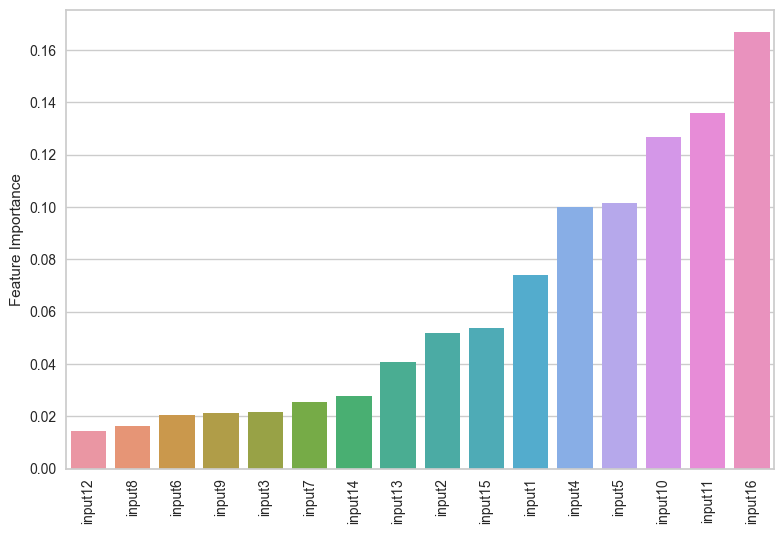

In [85]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [86]:
X2 = X.drop(columns = ["input14","input10"])

In [87]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state = 101)

In [88]:
DT2_model = DecisionTreeClassifier(random_state = 101)

In [89]:
DT2_model.fit(X_train2, y_train2)

DecisionTreeClassifier(random_state=101)

In [90]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[237   0   0   0   0   0   0   0   1   1]
 [  0 196  12   2   1   1   1   1   0   4]
 [  0   7 223   0   0   0   2   1   0   0]
 [  0   2   3 179   0   4   0   2   0   1]
 [  0   1   0   0 238   0   0   0   0   3]
 [  0   1   0   5   1 201   0   1   1   4]
 [  4   0   1   2   1   4 214   0   0   2]
 [  0   2   2   0   0   1   0 239   2   0]
 [  0   0   0   0   0   2   0   2 194   1]
 [  0   0   0   1   2   3   0   1   2 180]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       239
           1       0.94      0.90      0.92       218
           2       0.93      0.96      0.94       233
           3       0.95      0.94      0.94       191
           4       0.98      0.98      0.98       242
           5       0.93      0.94      0.93       214
           6       0.99      0.94      0.96       228
           7       0.97      0.97      0.97       246
           8       0.97      0.97      0.97       199
           9       

## Decision Tree Find Best Parameters

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
model = DecisionTreeClassifier(random_state=101)

In [93]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3, 4, 5, 6, 7],
              "max_depth": [None, 2,3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7, 8, 9]}

In [94]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1)

In [95]:
grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [96]:
grid_model.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [97]:
eval_metric(grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[237   0   0   0   0   0   0   0   1   1]
 [  0 196  12   2   1   1   1   1   0   4]
 [  0   7 223   0   0   0   2   1   0   0]
 [  0   2   3 179   0   4   0   2   0   1]
 [  0   1   0   0 238   0   0   0   0   3]
 [  0   1   0   5   1 201   0   1   1   4]
 [  4   0   1   2   1   4 214   0   0   2]
 [  0   2   2   0   0   1   0 239   2   0]
 [  0   0   0   0   0   2   0   2 194   1]
 [  0   0   0   1   2   3   0   1   2 180]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       239
           1       0.94      0.90      0.92       218
           2       0.93      0.96      0.94       233
           3       0.95      0.94      0.94       191
           4       0.98      0.98      0.98       242
           5       0.93      0.94      0.93       214
           6       0.99      0.94      0.96       228
           7       0.97      0.97      0.97       246
           8       0.97      0.97      0.97       199
           9       

# Random Forest Classifier

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
rf_model = RandomForestClassifier(random_state = 101)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [100]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[239   0   0   0   0   0   0   0   0   0]
 [  0 214   2   1   0   0   0   0   0   1]
 [  0   2 231   0   0   0   0   0   0   0]
 [  0   0   1 189   0   0   0   1   0   0]
 [  0   0   0   0 242   0   0   0   0   0]
 [  0   0   0   3   0 210   0   0   0   1]
 [  0   0   0   0   1   0 227   0   0   0]
 [  0   1   0   1   0   0   0 244   0   0]
 [  0   0   0   0   0   1   0   1 197   0]
 [  0   0   0   0   0   0   0   0   0 189]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       0.99      0.98      0.98       218
           2       0.99      0.99      0.99       233
           3       0.97      0.99      0.98       191
           4       1.00      1.00      1.00       242
           5       1.00      0.98      0.99       214
           6       1.00      1.00      1.00       228
           7       0.99      0.99      0.99       246
           8       1.00      0.99      0.99       199
           9       

In [101]:
model = RandomForestClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.990447
test_precision_micro    0.990447
test_recall_micro       0.990447
test_f1_micro           0.990447
dtype: float64

In [102]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

Feature Importance
input16            0.112556
input14            0.093469
input11            0.072911
input10            0.071443
input15            0.070980
input5             0.069012
input9             0.068794
input8             0.066684
input1             0.062743
input6             0.053411
input12            0.053104
input2             0.051404
input4             0.047906
input7             0.046130
input13            0.033235
input3             0.026217

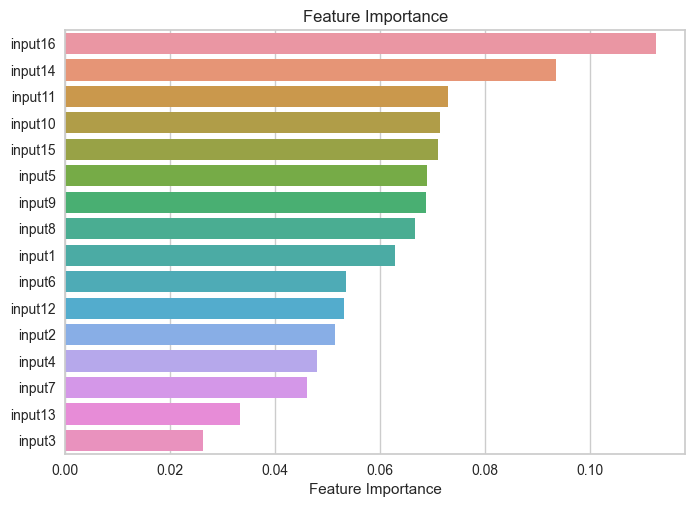

In [103]:
sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance")
plt.show()

In [104]:
pd.concat([rf_feature_imp, df_f_i], axis =1)

Feature Importance  Feature Importance
input16            0.112556            0.166958
input14            0.093469            0.027875
input11            0.072911            0.136103
input10            0.071443            0.126936
input15            0.070980            0.053715
input5             0.069012            0.101599
input9             0.068794            0.021344
input8             0.066684            0.016267
input1             0.062743            0.074166
input6             0.053411            0.020499
input12            0.053104            0.014441
input2             0.051404            0.052015
input4             0.047906            0.099884
input7             0.046130            0.025636
input13            0.033235            0.040736
input3             0.026217            0.021826

# Conclusion

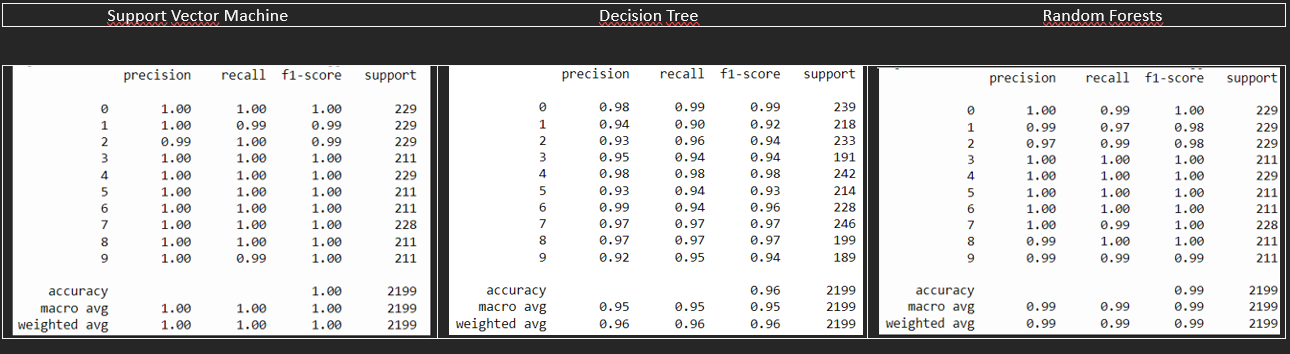

*Based on these results, we can consider several factors when evaluating the performance of different machine learning models.*

**Accuracy:**

Support Vector Machine (SVM): Shows 100% accuracy.
Decision Tree: 95% accuracy.
Random Forests: 99% accuracy.

**Weighted Average:**

Weighted average values for SVM, Decision Tree and Random Forests models can be listed as 100%, 95% and 99%.

**Macro and Weighted Average Differences:**

Macro and weighted average results for all three models are very close to each other. This may indicate that the models exhibit balanced performance across classes.

**Overfitting and Generalization Ability:**

SVM appears to have a good fit to the training data (100% accuracy). This may indicate overfitting and raise some concerns about generalizability to real-world data.
Decision Tree and Random Forests, on the other hand, seem to have more balanced performance. Random Forests can provide a better balance of generalizability along with high accuracy.

Ultimately, given its generalization abilities, the Decision Tree model appears to be a solid performer. However, the Random Forests model stands out with its higher accuracy and generalization ability. Although SVM demonstrates 100% accuracy, it may indicate overfitting and may be poor at generalizing to real-world data. Therefore, if a balance between generalization ability and performance is sought, the Random Forests model may be preferred.





 <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>You're welcome! Hope it proves helpful.</b></p>

**İlhami Mutlu** [LinkedIn](https://www.linkedin.com/in/ilhami-mutlu-653b02242/) |